In [1]:
# Datos Internet
import pandas as pd

ruta = "C:\\Users\\pablo\\Git\\uniovi-simur-datos\\MunecaMuslo\\datosInternet.csv"

df = pd.read_csv(ruta)

personas = 8
fm = 25

In [2]:
print(df.head())

   Unnamed: 0  accell_x  accell_y  accell_z    gyro_x    gyro_y    gyro_z  \
0           0  0.071455  0.579297  0.813578  0.003876 -0.005213 -0.001168   
1           1  0.073220  0.570897  0.812559  0.012862 -0.005241 -0.003029   
2           2  0.071202  0.577085  0.811091  0.021639 -0.010421  0.011992   
3           3  0.074209  0.574852  0.813078  0.016440  0.001875  0.002322   
4           4  0.072958  0.575341  0.812579  0.000286 -0.003408  0.002425   

   Persona  IMU  milisegundos  segundos  minutos  Ventana  grupo Ventana  \
0        1    1           0.0       0.0      0.0      0.0            0.0   
1        1    1          40.0       0.0      0.0      0.0            0.0   
2        1    1          80.0       0.0      0.0      0.0            0.0   
3        1    1         120.0       0.0      0.0      0.0            0.0   
4        1    1         160.0       0.0      0.0      0.0            0.0   

       ENMO Actividad  Actividad formato numerico  MET Compendio  
0  0.001299  

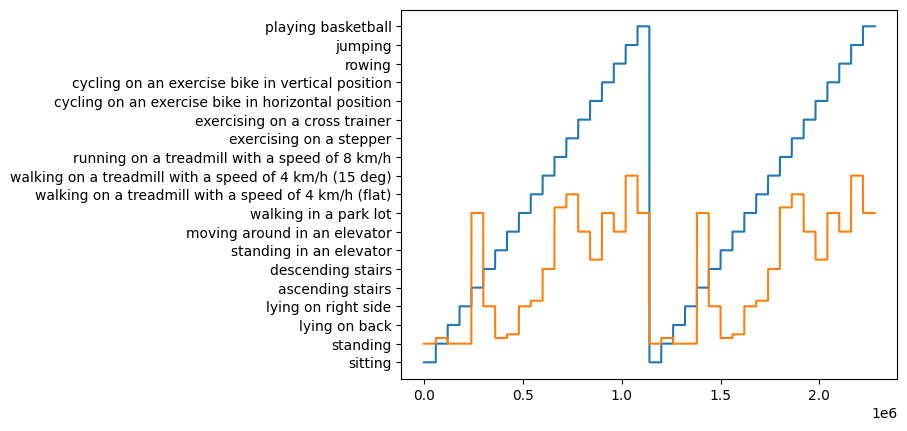

In [4]:
import matplotlib.pyplot as plt

plt.plot(df['Actividad'])

plt.plot(df['MET Compendio'])

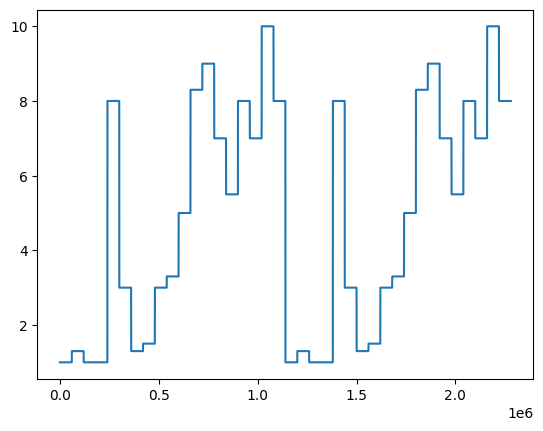

In [5]:
plt.plot(df['MET Compendio'])

In [3]:
# Extraccion de caracteristicas

import caracteristicas as extracCarac

# Lista para almacenar los resultados de todas las personas
personas_resultados = []

# Bucle para iterar sobre las personas (1 a 8)
for j in range(1, personas+1):#(8+1):

    resultados = {}  # Inicializamos el diccionario de resultados para cada persona

    # Bucle para iterar sobre las IMU (de 1 a 4)
    for i in range(1, 5, 4):  # Iterar sobre las IMU (de 1 a 4)

        # Filtrar y agrupar por 'Ventana' para cada columna de la IMU y persona

        # Acceleration Min (X, Y, Z)
        accell_min_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].min()
        accell_min_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].min()
        accell_min_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].min()

        # Gyroscope Min (X, Y, Z)
        gyro_min_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].min()
        gyro_min_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].min()
        gyro_min_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].min()

        # Acceleration Max (X, Y, Z)
        accell_max_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].max()
        accell_max_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].max()
        accell_max_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].max()

        # Gyroscope Max (X, Y, Z)
        gyro_max_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].max()
        gyro_max_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].max()
        gyro_max_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].max()

        # Acceleration Percentile 50 (X, Y, Z) -- Quantile 0.5 (mediana)
        accell_x_percentile_50 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].quantile(0.5)
        accell_y_percentile_50 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].quantile(0.5)
        accell_z_percentile_50 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].quantile(0.5)

        # Gyroscope Percentile 50 (X, Y, Z)
        gyro_x_percentile_50 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].quantile(0.5)
        gyro_y_percentile_50 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].quantile(0.5)
        gyro_z_percentile_50 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].quantile(0.5)

        # Acceleration Percentile 25 (X, Y, Z)
        accell_x_percentile_25 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].quantile(0.25)
        accell_y_percentile_25 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].quantile(0.25)
        accell_z_percentile_25 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].quantile(0.25)

        # Gyroscope Percentile 25 (X, Y, Z) -- Aunque no se solicitaba, si lo necesitas puedes agregarlos de esta manera:
        gyro_x_percentile_25 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].quantile(0.25)
        gyro_y_percentile_25 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].quantile(0.25)
        gyro_z_percentile_25 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].quantile(0.25)

        # Acceleration Percentile 75 (X, Y, Z)
        accell_x_percentile_75 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].quantile(0.75)
        accell_y_percentile_75 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].quantile(0.75)
        accell_z_percentile_75 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].quantile(0.75)

        # Gyroscope Percentile 75 (X, Y, Z) -- Lo mismo que con los percentiles 25, si los necesitas puedes agregarlos de esta forma:
        gyro_x_percentile_75 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].quantile(0.75)
        gyro_y_percentile_75 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].quantile(0.75)
        gyro_z_percentile_75 = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].quantile(0.75)


        # Caracteristicas espectrales accell_x
        potencia_armonico_dominante_accell_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].apply(lambda group: extracCarac.potencia_armonico_dominante(group, fm))
        frecuencia_armonico_dominante_accell_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].apply(lambda group: extracCarac.frecuencia_armonico_dominante(group, fm))
        potencia_armonico_2_dominante_accell_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].apply(lambda group: extracCarac.potencia_armonico_2_dominante(group, fm))
        frecuencia_armonico_2_dominante_accell_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].apply(lambda group: extracCarac.frecuencia_armonico_2_dominante(group, fm))
        spectral_entropy_accell_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].apply(lambda group: extracCarac.spectral_entropy(group, fm))

        # Características espectrales accell_y
        potencia_armonico_dominante_accell_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].apply(lambda group: extracCarac.potencia_armonico_dominante(group, fm))
        frecuencia_armonico_dominante_accell_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].apply(lambda group: extracCarac.frecuencia_armonico_dominante(group, fm))
        potencia_armonico_2_dominante_accell_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].apply(lambda group: extracCarac.potencia_armonico_2_dominante(group, fm))
        frecuencia_armonico_2_dominante_accell_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].apply(lambda group: extracCarac.frecuencia_armonico_2_dominante(group, fm))
        spectral_entropy_accell_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].apply(lambda group: extracCarac.spectral_entropy(group, fm))

        # Características espectrales accell_z
        potencia_armonico_dominante_accell_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].apply(lambda group: extracCarac.potencia_armonico_dominante(group, fm))
        frecuencia_armonico_dominante_accell_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].apply(lambda group: extracCarac.frecuencia_armonico_dominante(group, fm))
        potencia_armonico_2_dominante_accell_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].apply(lambda group: extracCarac.potencia_armonico_2_dominante(group, fm))
        frecuencia_armonico_2_dominante_accell_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].apply(lambda group: extracCarac.frecuencia_armonico_2_dominante(group, fm))
        spectral_entropy_accell_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].apply(lambda group: extracCarac.spectral_entropy(group, fm))

        # Características espectrales gyro_x
        potencia_armonico_dominante_gyro_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].apply(lambda group: extracCarac.potencia_armonico_dominante(group, fm))
        frecuencia_armonico_dominante_gyro_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].apply(lambda group: extracCarac.frecuencia_armonico_dominante(group, fm))
        potencia_armonico_2_dominante_gyro_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].apply(lambda group: extracCarac.potencia_armonico_2_dominante(group, fm))
        frecuencia_armonico_2_dominante_gyro_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].apply(lambda group: extracCarac.frecuencia_armonico_2_dominante(group, fm))
        spectral_entropy_gyro_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].apply(lambda group: extracCarac.spectral_entropy(group, fm))

        # Características espectrales gyro_y
        potencia_armonico_dominante_gyro_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].apply(lambda group: extracCarac.potencia_armonico_dominante(group, fm))
        frecuencia_armonico_dominante_gyro_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].apply(lambda group: extracCarac.frecuencia_armonico_dominante(group, fm))
        potencia_armonico_2_dominante_gyro_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].apply(lambda group: extracCarac.potencia_armonico_2_dominante(group, fm))
        frecuencia_armonico_2_dominante_gyro_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].apply(lambda group: extracCarac.frecuencia_armonico_2_dominante(group, fm))
        spectral_entropy_gyro_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].apply(lambda group: extracCarac.spectral_entropy(group, fm))

        # Características espectrales gyro_z
        potencia_armonico_dominante_gyro_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].apply(lambda group: extracCarac.potencia_armonico_dominante(group, fm))
        frecuencia_armonico_dominante_gyro_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].apply(lambda group: extracCarac.frecuencia_armonico_dominante(group, fm))
        potencia_armonico_2_dominante_gyro_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].apply(lambda group: extracCarac.potencia_armonico_2_dominante(group, fm))
        frecuencia_armonico_2_dominante_gyro_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].apply(lambda group: extracCarac.frecuencia_armonico_2_dominante(group, fm))
        spectral_entropy_gyro_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].apply(lambda group: extracCarac.spectral_entropy(group, fm))

        # Picos accell_x
        numero_picos_accell_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].apply(lambda group: extracCarac.numero_picos(group))
        prominencia_media_accell_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_x'].apply(lambda group: extracCarac.prominencia_media(group))

        # Picos accell_y
        numero_picos_accell_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].apply(lambda group: extracCarac.numero_picos(group))
        prominencia_media_accell_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_y'].apply(lambda group: extracCarac.prominencia_media(group))

        # Picos accell_z
        numero_picos_accell_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].apply(lambda group: extracCarac.numero_picos(group))
        prominencia_media_accell_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['accell_z'].apply(lambda group: extracCarac.prominencia_media(group))

        # Picos gyro_x
        numero_picos_gyro_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].apply(lambda group: extracCarac.numero_picos(group))
        prominencia_media_gyro_x = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_x'].apply(lambda group: extracCarac.prominencia_media(group))

        # Picos gyro_y
        numero_picos_gyro_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].apply(lambda group: extracCarac.numero_picos(group))
        prominencia_media_gyro_y = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_y'].apply(lambda group: extracCarac.prominencia_media(group))

        # Picos gyro_z
        numero_picos_gyro_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].apply(lambda group: extracCarac.numero_picos(group))
        prominencia_media_gyro_z = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['gyro_z'].apply(lambda group: extracCarac.prominencia_media(group))

        # Obtener correlaciones entre accell y gyro por ventana
        MatrizCorrelaciones_total = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])[
            ['accell_x', 'accell_y', 'accell_z', 'gyro_x', 'gyro_y', 'gyro_z']
        ].corr()

        #  Accell vs Accell
        columna_corr_x = MatrizCorrelaciones_total.loc[:, ('accell_x')]
        correlation_x_y = pd.Series([columna_corr_x.iloc[k] for k in range(1, len(columna_corr_x), 6)])
        correlation_x_z = pd.Series([columna_corr_x.iloc[k] for k in range(2, len(columna_corr_x), 6)])

        columna_corr_y = MatrizCorrelaciones_total.loc[:, ('accell_y')]
        correlation_y_z = pd.Series([columna_corr_y.iloc[k] for k in range(2, len(columna_corr_y), 6)])

        # Accell vs Gyro
        correlation_ax_gx = pd.Series([columna_corr_x.iloc[k] for k in range(3, len(columna_corr_x), 6)])
        correlation_ax_gy = pd.Series([columna_corr_x.iloc[k] for k in range(4, len(columna_corr_x), 6)])
        correlation_ax_gz = pd.Series([columna_corr_x.iloc[k] for k in range(5, len(columna_corr_x), 6)])

        columna_corr_y = MatrizCorrelaciones_total.loc[:, ('accell_y')]
        correlation_ay_gx = pd.Series([columna_corr_y.iloc[k] for k in range(3, len(columna_corr_y), 6)])
        correlation_ay_gy = pd.Series([columna_corr_y.iloc[k] for k in range(4, len(columna_corr_y), 6)])
        correlation_ay_gz = pd.Series([columna_corr_y.iloc[k] for k in range(5, len(columna_corr_y), 6)])

        columna_corr_z = MatrizCorrelaciones_total.loc[:, ('accell_z')]
        correlation_az_gx = pd.Series([columna_corr_z.iloc[k] for k in range(3, len(columna_corr_z), 6)])
        correlation_az_gy = pd.Series([columna_corr_z.iloc[k] for k in range(4, len(columna_corr_z), 6)])
        correlation_az_gz = pd.Series([columna_corr_z.iloc[k] for k in range(5, len(columna_corr_z), 6)])

        # Gyro vs Gyro
        columna_corr_gyro_x = MatrizCorrelaciones_total.loc[:, ('gyro_x')]
        correlation_gx_gy = pd.Series([columna_corr_gyro_x.iloc[k] for k in range(4, len(columna_corr_gyro_x), 6)])
        correlation_gx_gz = pd.Series([columna_corr_gyro_x.iloc[k] for k in range(5, len(columna_corr_gyro_x), 6)])

        columna_corr_gyro_y = MatrizCorrelaciones_total.loc[:, ('gyro_y')]
        correlation_gy_gz = pd.Series([columna_corr_gyro_y.iloc[k] for k in range(5, len(columna_corr_gyro_y), 6)])

        # Autocorrelacion 1s que es un lag de 25 muestras
        autocorrelacion_1s = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['ENMO'].apply(lambda group: extracCarac.autocorrelacion_desplazada(group,25))

        # Roll, pitch, yaw
        resultados_rpy = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby('Ventana')[['accell_x','accell_y','accell_z','gyro_z']].apply(
                            lambda group: extracCarac.calcular_roll_pitch_yaw(group['accell_x'].values, group['accell_y'].values, group['accell_z'].values, group['gyro_z'].values))

        rolls = resultados_rpy.apply(lambda x: x[0])  
        pitches = resultados_rpy.apply(lambda x: x[1])
        yaws = resultados_rpy.apply(lambda x: x[2])  

        # METs Compendio
        MET = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['MET Compendio'].mean()
        Actividad_num = df[(df['IMU'] == i) & (df['Persona'] == j)].groupby(['Ventana'])['Actividad formato numerico'].mean()


        # Guardar resultados
        resultados[f'accell_min_x_{i}'] = accell_min_x
        resultados[f'accell_min_y_{i}'] = accell_min_y
        resultados[f'accell_min_z_{i}'] = accell_min_z

        resultados[f'gyro_min_x_{i}'] = gyro_min_x
        resultados[f'gyro_min_y_{i}'] = gyro_min_y
        resultados[f'gyro_min_z_{i}'] = gyro_min_z

        resultados[f'accell_max_x_{i}'] = accell_max_x
        resultados[f'accell_max_y_{i}'] = accell_max_y
        resultados[f'accell_max_z_{i}'] = accell_max_z

        resultados[f'gyro_max_x_{i}'] = gyro_max_x
        resultados[f'gyro_max_y_{i}'] = gyro_max_y
        resultados[f'gyro_max_z_{i}'] = gyro_max_z

        resultados[f'accell_x_percentile_50_{i}'] = accell_x_percentile_50
        resultados[f'accell_y_percentile_50_{i}'] = accell_y_percentile_50
        resultados[f'accell_z_percentile_50_{i}'] = accell_z_percentile_50

        resultados[f'gyro_x_percentile_50_{i}'] = gyro_x_percentile_50
        resultados[f'gyro_y_percentile_50_{i}'] = gyro_y_percentile_50
        resultados[f'gyro_z_percentile_50_{i}'] = gyro_z_percentile_50

        resultados[f'accell_x_percentile_25_{i}'] = accell_x_percentile_25
        resultados[f'accell_y_percentile_25_{i}'] = accell_y_percentile_25
        resultados[f'accell_z_percentile_25_{i}'] = accell_z_percentile_25

        resultados[f'gyro_x_percentile_25_{i}'] = gyro_x_percentile_25
        resultados[f'gyro_y_percentile_25_{i}'] = gyro_y_percentile_25
        resultados[f'gyro_z_percentile_25_{i}'] = gyro_z_percentile_25

        resultados[f'accell_x_percentile_75_{i}'] = accell_x_percentile_75
        resultados[f'accell_y_percentile_75_{i}'] = accell_y_percentile_75
        resultados[f'accell_z_percentile_75_{i}'] = accell_z_percentile_75

        resultados[f'gyro_x_percentile_75_{i}'] = gyro_x_percentile_75
        resultados[f'gyro_y_percentile_75_{i}'] = gyro_y_percentile_75
        resultados[f'gyro_z_percentile_75_{i}'] = gyro_z_percentile_75

        resultados[f'potencia_armonico_dominante_accell_x_{i}'] = potencia_armonico_dominante_accell_x
        resultados[f'frecuencia_armonico_dominante_accell_x_{i}'] = frecuencia_armonico_dominante_accell_x
        resultados[f'potencia_armonico_2_dominante_accell_x_{i}'] = potencia_armonico_2_dominante_accell_x
        resultados[f'frecuencia_armonico_2_dominante_accell_x_{i}'] = frecuencia_armonico_2_dominante_accell_x
        resultados[f'spectral_entropy_accell_x_{i}'] = spectral_entropy_accell_x

        resultados[f'potencia_armonico_dominante_accell_y_{i}'] = potencia_armonico_dominante_accell_y
        resultados[f'frecuencia_armonico_dominante_accell_y_{i}'] = frecuencia_armonico_dominante_accell_y
        resultados[f'potencia_armonico_2_dominante_accell_y_{i}'] = potencia_armonico_2_dominante_accell_y
        resultados[f'frecuencia_armonico_2_dominante_accell_y_{i}'] = frecuencia_armonico_2_dominante_accell_y
        resultados[f'spectral_entropy_accell_y_{i}'] = spectral_entropy_accell_y

        resultados[f'potencia_armonico_dominante_accell_z_{i}'] = potencia_armonico_dominante_accell_z
        resultados[f'frecuencia_armonico_dominante_accell_z_{i}'] = frecuencia_armonico_dominante_accell_z
        resultados[f'potencia_armonico_2_dominante_accell_z_{i}'] = potencia_armonico_2_dominante_accell_z
        resultados[f'frecuencia_armonico_2_dominante_accell_z_{i}'] = frecuencia_armonico_2_dominante_accell_z
        resultados[f'spectral_entropy_accell_z_{i}'] = spectral_entropy_accell_z

        resultados[f'potencia_armonico_dominante_gyro_x_{i}'] = potencia_armonico_dominante_gyro_x
        resultados[f'frecuencia_armonico_dominante_gyro_x_{i}'] = frecuencia_armonico_dominante_gyro_x
        resultados[f'potencia_armonico_2_dominante_gyro_x_{i}'] = potencia_armonico_2_dominante_gyro_x
        resultados[f'frecuencia_armonico_2_dominante_gyro_x_{i}'] = frecuencia_armonico_2_dominante_gyro_x
        resultados[f'spectral_entropy_gyro_x_{i}'] = spectral_entropy_gyro_x

        resultados[f'potencia_armonico_dominante_gyro_y_{i}'] = potencia_armonico_dominante_gyro_y
        resultados[f'frecuencia_armonico_dominante_gyro_y_{i}'] = frecuencia_armonico_dominante_gyro_y
        resultados[f'potencia_armonico_2_dominante_gyro_y_{i}'] = potencia_armonico_2_dominante_gyro_y
        resultados[f'frecuencia_armonico_2_dominante_gyro_y_{i}'] = frecuencia_armonico_2_dominante_gyro_y
        resultados[f'spectral_entropy_gyro_y_{i}'] = spectral_entropy_gyro_y

        resultados[f'potencia_armonico_dominante_gyro_z_{i}'] = potencia_armonico_dominante_gyro_z
        resultados[f'frecuencia_armonico_dominante_gyro_z_{i}'] = frecuencia_armonico_dominante_gyro_z
        resultados[f'potencia_armonico_2_dominante_gyro_z_{i}'] = potencia_armonico_2_dominante_gyro_z
        resultados[f'frecuencia_armonico_2_dominante_gyro_z_{i}'] = frecuencia_armonico_2_dominante_gyro_z
        resultados[f'spectral_entropy_gyro_z_{i}'] = spectral_entropy_gyro_z

        resultados[f'numero_picos_accell_x_{i}'] = numero_picos_accell_x
        resultados[f'prominencia_media_accell_x_{i}'] = prominencia_media_accell_x

        resultados[f'numero_picos_accell_y_{i}'] = numero_picos_accell_y
        resultados[f'prominencia_media_accell_y_{i}'] = prominencia_media_accell_y

        resultados[f'numero_picos_accell_z_{i}'] = numero_picos_accell_z
        resultados[f'prominencia_media_accell_z_{i}'] = prominencia_media_accell_z

        resultados[f'numero_picos_gyro_x_{i}'] = numero_picos_gyro_x
        resultados[f'prominencia_media_gyro_x_{i}'] = prominencia_media_gyro_x

        resultados[f'numero_picos_gyro_y_{i}'] = numero_picos_gyro_y
        resultados[f'prominencia_media_gyro_y_{i}'] = prominencia_media_gyro_y

        resultados[f'numero_picos_gyro_z_{i}'] = numero_picos_gyro_z
        resultados[f'prominencia_media_gyro_z_{i}'] = prominencia_media_gyro_z

        resultados[f'correlation_acc_x_y_{i}'] = correlation_x_y
        resultados[f'correlation_acc_x_z_{i}'] = correlation_x_z
        resultados[f'correlation_acc_y_z_{i}'] = correlation_y_z

        resultados[f'correlation_acc_x_gyro_x_{i}'] = correlation_ax_gx
        resultados[f'correlation_acc_x_gyro_y_{i}'] = correlation_ax_gy
        resultados[f'correlation_acc_x_gyro_z_{i}'] = correlation_ax_gz

        resultados[f'correlation_acc_y_gyro_x_{i}'] = correlation_ay_gx
        resultados[f'correlation_acc_y_gyro_y_{i}'] = correlation_ay_gy
        resultados[f'correlation_acc_y_gyro_z_{i}'] = correlation_ay_gz

        resultados[f'correlation_acc_z_gyro_x_{i}'] = correlation_az_gx
        resultados[f'correlation_acc_z_gyro_y_{i}'] = correlation_az_gy
        resultados[f'correlation_acc_z_gyro_z_{i}'] = correlation_az_gz

        resultados[f'correlation_gyro_x_y_{i}'] = correlation_gx_gy
        resultados[f'correlation_gyro_x_z_{i}'] = correlation_gx_gz
        resultados[f'correlation_gyro_y_z_{i}'] = correlation_gy_gz

        resultados[f'autocorrelacion_1s_{i}'] = autocorrelacion_1s

        resultados[f'roll_prom_{i}'] = rolls
        resultados[f'pitch_prom_{i}'] = pitches
        resultados[f'yaw_prom_{i}'] = yaws



        resultados[f'MET Compendio'] = MET
        resultados[f'Actividad formato numerico'] = Actividad_num


    # Convertir el diccionario de resultados a un DataFrame para la persona j
    persona_df = pd.concat(resultados, axis=1)

    # Agregar el DataFrame de la persona a la lista
    personas_resultados.append(persona_df)

# Concatenar los DataFrames de todas las personas (de 1 a 7) debajo uno del otro
final_result = pd.concat(personas_resultados, axis=0, ignore_index=True)

print(final_result.shape)
# Mostrar el DataFrame resultante
print(final_result)

c:\Users\pablo\Git\uniovi-simur-wearablepermed-mets\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\pablo\Git\uniovi-simur-wearablepermed-mets\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\pablo\Git\uniovi-simur-wearablepermed-mets\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\pablo\Git\uniovi-simur-wearablepermed-mets\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\pablo\Git\uniovi-simur-wearablepermed-mets\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\pablo\Git\uniovi-simur-wearablepermed-met

(9120, 93)
      accell_min_x_1  accell_min_y_1  accell_min_z_1  gyro_min_x_1  \
0           0.059676        0.570398        0.799246     -0.014167   
1           0.054092        0.577849        0.795882     -0.068181   
2           0.054583        0.587727        0.794883     -0.008777   
3           0.052522        0.586707        0.788981     -0.017948   
4           0.051514        0.595148        0.792915     -0.009823   
...              ...             ...             ...           ...   
9115       -0.499643       -1.033741       -2.324057     -7.904100   
9116       -1.016126       -4.925586       -1.745056     -6.477500   
9117       -0.859470       -0.679980       -0.228379     -5.733600   
9118       -2.064322       -2.026809       -1.059123     -5.462000   
9119       -2.329969       -1.402650       -2.242813     -6.560700   

      gyro_min_y_1  gyro_min_z_1  accell_max_x_1  accell_max_y_1  \
0        -0.017639     -0.035780        0.077401        0.596157   
1        -0.

In [4]:
"""
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from tensorflow import keras
#import keras_tuner as kt
#from tensorflow.keras import regularizers

from keras.callbacks import EarlyStopping
"""

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import regularizers

import keras_tuner as kt

# Seleccionar características y etiquetas
X = final_result.drop(['MET Compendio', 'Actividad formato numerico'], axis = 1).to_numpy()
y = final_result['MET Compendio'].to_numpy()

import numpy as np

print(np.isnan(X).sum(), np.isinf(X).sum())
print(np.isnan(y).sum(), np.isinf(y).sum())

# que no haya nans
mask = ~np.isnan(X).any(axis=1)

X = X[mask]
y = y[mask]

print(X.shape, y.shape)


print(X.shape)

random = 42

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=random)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.222, random_state=random)

print(X_train.shape)

31 0
0 0
(9089, 91) (9089,)
(9089, 91)
(5656, 91)


In [ ]:
# 3 de validación cruzada
kf = KFold(n_splits=3, shuffle=True, random_state=42)

results = []
all_units_layer_1 = []  # Para almacenar las configuraciones de unidades en la capa densa
all_units_layer_2 = []  # Para almacenar las configuraciones de unidades en la segunda capa
all_units_layer_3 = []  # Para una capa adicional
all_r2_scores = []  # Para almacenar los R^2 de validación
best_trials_info = []  # Para almacenar los mejores resultados

# Definir la función para crear el modelo con múltiples capas
def create_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(X_train.shape[1],)))
    
 
    hp_units_1 = hp.Int('Capa 1', min_value=256, max_value=1024, step=2, sampling='log')
    model.add(keras.layers.Dense(units=hp_units_1, kernel_regularizer=regularizers.l2(0.0001)))
    model.add(keras.layers.BatchNormalization())  
    model.add(keras.layers.ReLU()) 
    model.add(keras.layers.Dropout(0.2))

    # Segunda capa densa (opcional) con BatchNormalization, Regularización L1 y Dropout
    if (hp.Boolean('segunda_capa') or hp.Boolean('tercera_capa')):
        hp_units_2 = hp.Int('Capa 2', min_value=128, max_value=256, step=2, sampling='log')
        model.add(keras.layers.Dense(units=hp_units_2, kernel_regularizer=regularizers.l2(0.0001)))  # Regularización L1
        model.add(keras.layers.BatchNormalization())  # Normalización de lotes
        model.add(keras.layers.ReLU())  # Activación ReLU
        model.add(keras.layers.Dropout(0.2))  # Dropout para evitar sobreajuste

        # Tercera capa densa (opcional) con BatchNormalization, Regularización L1 y Dropout
        if hp.Boolean('tercera_capa'):
            hp_units_3 = hp.Int('Capa 3', min_value=16, max_value=128, step=2, sampling='log')
            model.add(keras.layers.Dense(units=hp_units_3, kernel_regularizer=regularizers.l2(0.0001)))  # Regularización L1
            model.add(keras.layers.BatchNormalization())  # Normalización de lotes
            model.add(keras.layers.ReLU())  # Activación ReLU
            model.add(keras.layers.Dropout(0.2))  # Dropout para evitar sobreajuste
    
    # Capa de salida (sin activación para regresión)
    model.add(keras.layers.Dense(1, activation='linear'))
    

    # Compilación del modelo
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.MeanSquaredError()])
    return model

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear (puede ser 'val_loss', 'val_accuracy', etc.)
    patience=5,  # Número de épocas sin mejora antes de detener el entrenamiento
    min_delta=0.001,  # Cambio mínimo para ser considerado una mejora
    restore_best_weights=True  # Restaurar los mejores pesos al final de la detención temprana
)

In [ ]:
models = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):

    # Cada fold tiene un train y un val dentro del train
    print("-----------------------------------------------------------------")
    print(f"Fold {fold + 1}")

    # Dividir datos en entrenamiento y validación para este pliegue
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    # Crear tuner para random search
    tuner = kt.RandomSearch(
        create_model,
        objective='val_loss',
        max_trials= 16,
        max_retries_per_trial=0,
        project_name=f"project_fold_{fold + 1}",  # Nombre único para cada pliegue
        overwrite=True  # Sobrescribir el proyecto anterior
    )

    # Callback de early stopping
    stop_early = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    # Realizar la búsqueda de hiperparámetros
    tuner.search(X_fold_train, y_fold_train, batch_size=256,epochs=200, validation_data=(X_fold_val, y_fold_val), callbacks=[early_stopping])

    # Obtener los mejores hiperparámetros
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    hypermodel = tuner.hypermodel.build(best_hps)
    hypermodel.fit(X_fold_train, y_fold_train, epochs=200, validation_data=(X_fold_val, y_fold_val), callbacks=[early_stopping], verbose=1)

    # Evaluar el modelo en el conjunto de validación
    eval_result = hypermodel.evaluate(X_fold_val, y_fold_val)
    print("[Pérdida de prueba, MSE de prueba]:", eval_result)

    # Almacenar el modelo entrenado en la lista
    models.append(hypermodel)  # Guarda el modelo para este fold

    # Calcular R^2 en el conjunto de validación
    y_pred_val = hypermodel.predict(X_fold_val)
    r2 = r2_score(y_fold_val, y_pred_val)
    all_r2_scores.append(r2)

    print(f"Fold {fold + 1}: R^2 de validación = {r2:.4f}")

for i, model in enumerate(models):
    model.save(f"model_fold_{i+1}.h5")
    print(f"Modelo del fold {i+1} guardado como 'model_fold_{i+1}.h5'")

Trial 16 Complete [00h 01m 08s]
val_loss: 0.5294362306594849

Best val_loss So Far: 0.4712189733982086
Total elapsed time: 00h 12m 30s
Epoch 1/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 24.7979 - mean_squared_error: 24.7565 - val_loss: 12.1630 - val_mean_squared_error: 12.1210
Epoch 2/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 7.6673 - mean_squared_error: 7.6251 - val_loss: 3.1800 - val_mean_squared_error: 3.1375
Epoch 3/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.3111 - mean_squared_error: 3.2684 - val_loss: 1.1764 - val_mean_squared_error: 1.1334
Epoch 4/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.5775 - mean_squared_error: 2.5343 - val_loss: 1.0765 - val_mean_squared_error: 1.0329
Epoch 5/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.1016 - mean_squared_error: 2.0579 - val_loss: 0.8596 - val_mean_squared_error: 0.8155
Epoch 6/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.0543 - mean_squared_error: 2.0101 - val_loss: 0


Modelo del fold 1 guardado como 'model_fold_1.h5'
Modelo del fold 2 guardado como 'model_fold_2.h5'
Modelo del fold 3 guardado como 'model_fold_3.h5'


In [6]:
from tensorflow.keras.models import load_model

modelo_cargado1 = load_model('model_fold_1.h5')
modelo_cargado1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 91)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │        47,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,619 (467.27 KB)

 Trainable params: 118,273 (462.00 KB)

 Non-trainable params: 1,344 (5.25 KB)

 Optimizer params: 2 (12.00 B)

In [7]:
modelo_cargado2 = load_model('model_fold_2.h5')
modelo_cargado2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 91)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │        94,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395,267 (1.51 MB)

 Trainable params: 392,449 (1.50 MB)

 Non-trainable params: 2,816 (11.00 KB)

 Optimizer params: 2 (12.00 B)

In [8]:
modelo_cargado3 = load_model('model_fold_3.h5')
modelo_cargado3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 91)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │        47,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,619 (467.27 KB)

 Trainable params: 118,273 (462.00 KB)

 Non-trainable params: 1,344 (5.25 KB)

 Optimizer params: 2 (12.00 B)

In [9]:
from sklearn.metrics import mean_squared_error

y_pred_train = modelo_cargado1.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"\nR^2 en el conjunto de train: {r2_train:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de train: {mse_train:.4f}")

y_pred_val = modelo_cargado1.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)

print(f"\nR^2 en el conjunto de val: {r2_val:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de val: {mse_val:.4f}")

y_pred_test = modelo_cargado1.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"\nR^2 en el conjunto de test: {r2_test:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de test: {mse_test:.4f}")

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step

R^2 en el conjunto de train: 0.9642
Error cuadrático medio (MSE) en el conjunto de train: 0.3478
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step

R^2 en el conjunto de val: 0.9427
Error cuadrático medio (MSE) en el conjunto de val: 0.5611
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step

R^2 en el conjunto de test: 0.9400
Error cuadrático medio (MSE) en el conjunto de test: 0.5822


In [10]:
y_pred_train = modelo_cargado2.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"\nR^2 en el conjunto de train: {r2_train:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de train: {mse_train:.4f}")

y_pred_val = modelo_cargado2.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)

print(f"\nR^2 en el conjunto de val: {r2_val:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de val: {mse_val:.4f}")

y_pred_test = modelo_cargado2.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"\nR^2 en el conjunto de test: {r2_test:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de test: {mse_test:.4f}")

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

R^2 en el conjunto de train: 0.9634
Error cuadrático medio (MSE) en el conjunto de train: 0.3559
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step

R^2 en el conjunto de val: 0.9418
Error cuadrático medio (MSE) en el conjunto de val: 0.5699
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step

R^2 en el conjunto de test: 0.9474
Error cuadrático medio (MSE) en el conjunto de test: 0.5103


In [11]:
y_pred_train = modelo_cargado3.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"\nR^2 en el conjunto de train: {r2_train:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de train: {mse_train:.4f}")

y_pred_val = modelo_cargado3.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)

print(f"\nR^2 en el conjunto de val: {r2_val:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de val: {mse_val:.4f}")

y_pred_test = modelo_cargado3.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"\nR^2 en el conjunto de test: {r2_test:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de test: {mse_test:.4f}")

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

R^2 en el conjunto de train: 0.9640
Error cuadrático medio (MSE) en el conjunto de train: 0.3497
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step

R^2 en el conjunto de val: 0.9317
Error cuadrático medio (MSE) en el conjunto de val: 0.6680
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step

R^2 en el conjunto de test: 0.9372
Error cuadrático medio (MSE) en el conjunto de test: 0.6094


In [14]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear (puede ser 'val_loss', 'val_accuracy', etc.)
    patience=10,  # Número de épocas sin mejora antes de detener el entrenamiento
    min_delta=0.001,  # Cambio mínimo para ser considerado una mejora
    restore_best_weights=True  # Restaurar los mejores pesos al final de la detención temprana
)

modelo_final = modelo_cargado2

modelo_final.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.MeanSquaredError()])
modelo_final.fit(X_train, y_train, epochs=100, batch_size=256, verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.8867 - mean_squared_error: 0.7983
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7839 - mean_squared_error: 0.6949
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7022 - mean_squared_error: 0.6126
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6760 - mean_squared_error: 0.5861
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5796 - mean_squared_error: 0.4894
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6282 - mean_squared_error: 0.5378
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5698 - mean_squared_error: 0.4792
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5861 - mean_squared_error: 0.4954
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5499 - mean_squared_error: 0.4590
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5643 - mean_squared_error: 0.4732
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/st

In [15]:
y_pred_train = modelo_final.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"\nR^2 en el conjunto de train: {r2_train:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de train: {mse_train:.4f}")

y_pred_val = modelo_final.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)

print(f"\nR^2 en el conjunto de val: {r2_val:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de val: {mse_val:.4f}")

y_pred_test = modelo_final.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"\nR^2 en el conjunto de test: {r2_test:.4f}")
print(f"Error cuadrático medio (MSE) en el conjunto de test: {mse_test:.4f}")

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

R^2 en el conjunto de train: 0.9969
Error cuadrático medio (MSE) en el conjunto de train: 0.0300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step

R^2 en el conjunto de val: 0.9614
Error cuadrático medio (MSE) en el conjunto de val: 0.3781
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step

R^2 en el conjunto de test: 0.9607
Error cuadrático medio (MSE) en el conjunto de test: 0.3816


In [17]:
# Guardar el modelo de la variable hypermodel
model_save_path = f"modelo_red_Muneca_transferLearning.h5" 
modelo_final.save(model_save_path)
print(f"Modelo guardado en {model_save_path}")

Modelo guardado en modelo_red_Muneca_transferLearning.h5
